In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Reading the data from the csv
hotel = pd.read_csv("/Users/damac20/Downloads/Hotel Reservations.csv")
hotel.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
print("There are {} rows and {} columns in this dataset".format(hotel.shape[0], hotel.shape[1]))

There are 36275 rows and 19 columns in this dataset


In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
hotel.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [6]:
hotel.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
hotel.duplicated().sum()

0

In [8]:
hotel["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [9]:
hotel["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [10]:
#Roomtype-1 seems to be the priority for the Customers, followed by Roomtype 4.
#There is almost the same no number of Cancellation/Non Cancellations for this column.
#Hencer there is no significant impact on booking status


hotel["room_type_reserved"].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [11]:
#Those who require parking space are less likely to cancel their bookings.
#However people in this category are low in numbers, hence insignificant.
#So this cant become our Principal Component.

hotel["required_car_parking_space"].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [12]:
hotel["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [13]:
vals = hotel.booking_status.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names,title="Booking Status Distribution")
fig.show()

<AxesSubplot:xlabel='booking_status', ylabel='count'>

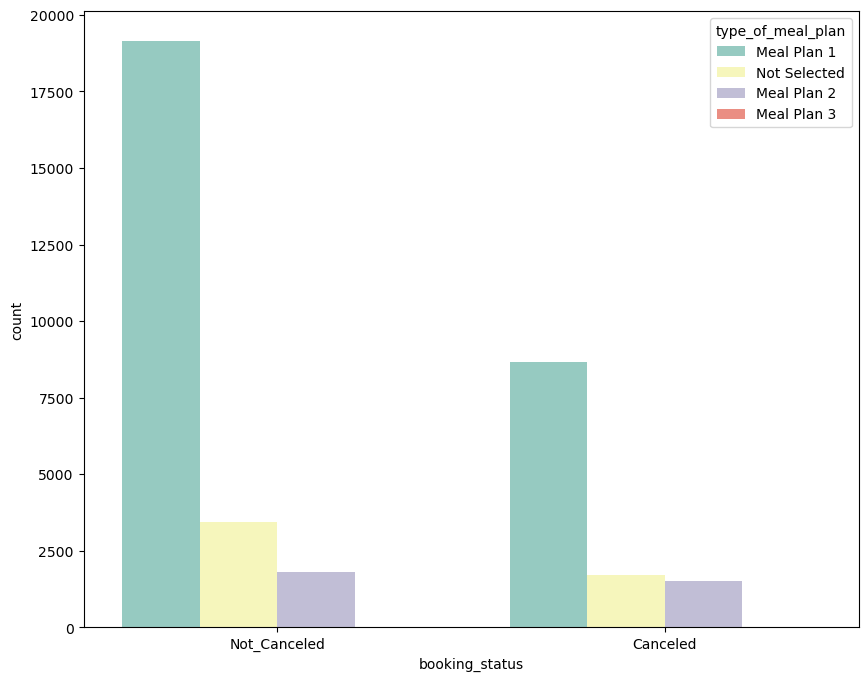

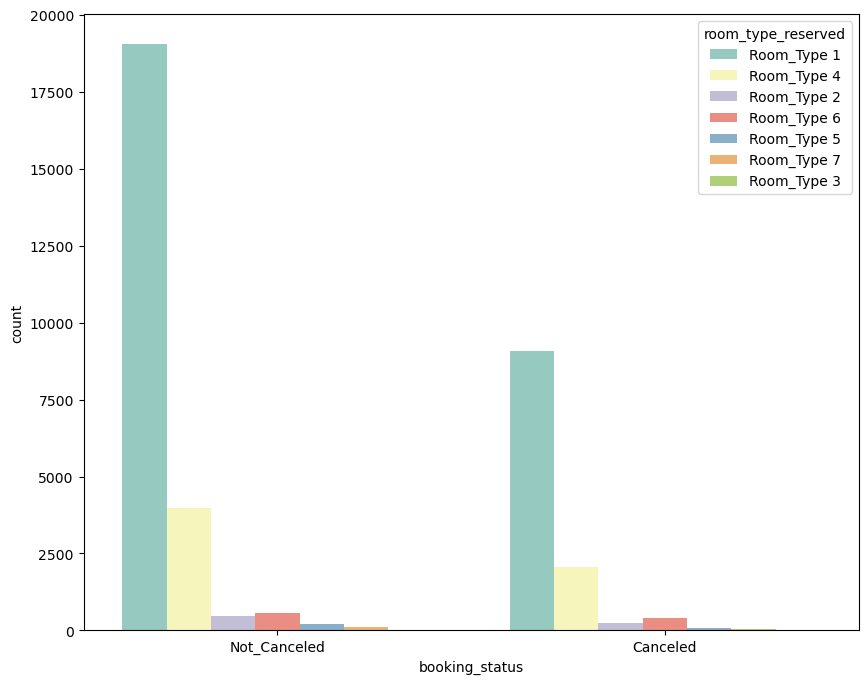

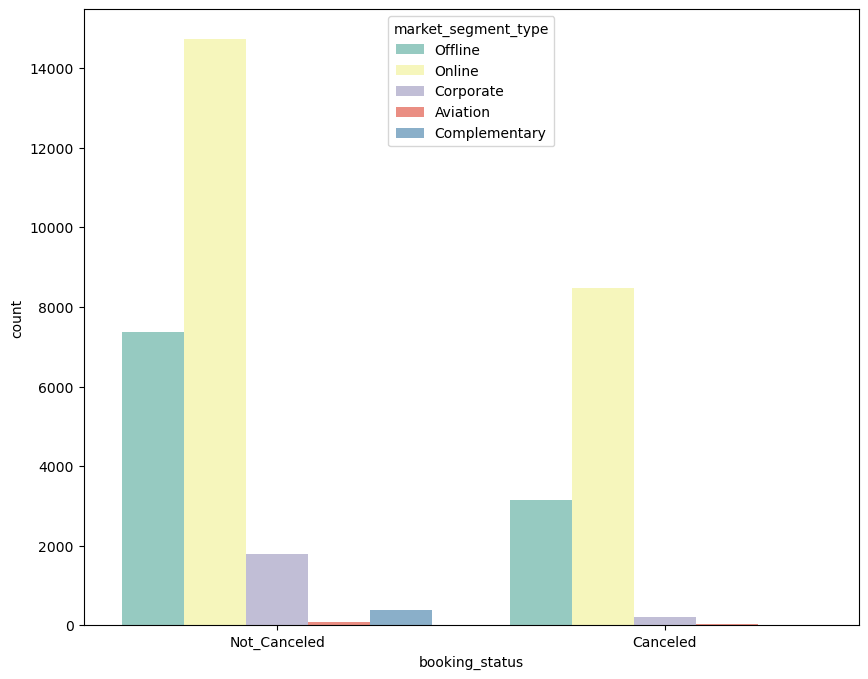

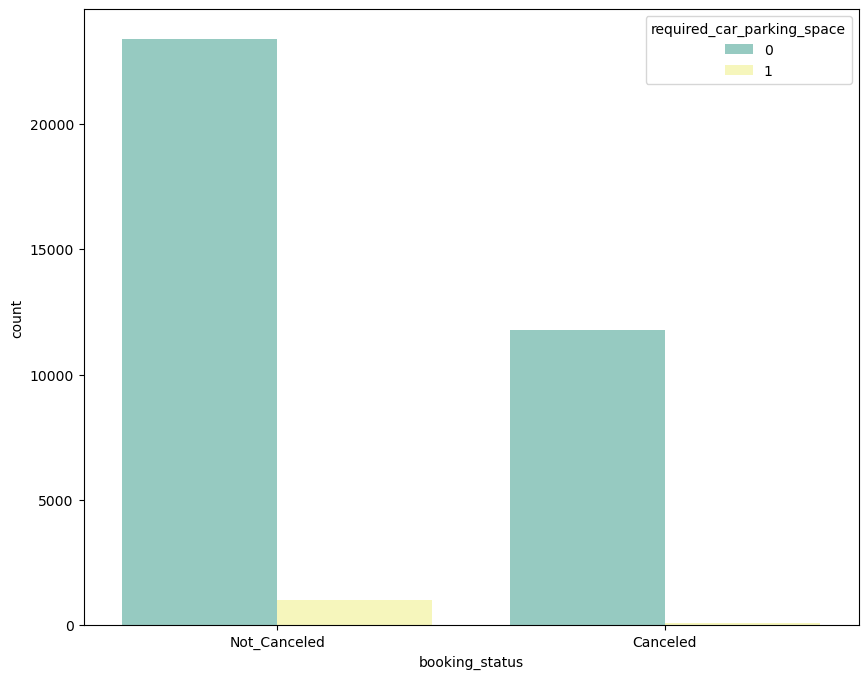

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x='booking_status',palette = 'Set3',hue='type_of_meal_plan',data=hotel)

plt.figure(figsize=(10,8))
sns.countplot(x='booking_status',palette = 'Set3',hue='room_type_reserved',data=hotel)

plt.figure(figsize=(10,8))
sns.countplot(x='booking_status',palette = 'Set3',hue='market_segment_type',data=hotel)

plt.figure(figsize=(10,8))
sns.countplot(x='booking_status',palette = 'Set3',hue='required_car_parking_space',data=hotel)

In [15]:
vals = hotel.market_segment_type.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names)
fig.update_layout(
    title={
        'text': "Market Segment Types Distribution",
        'font': {'size': 24}
    }
)
fig.show()

In [16]:
vals = hotel.room_type_reserved.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names)
fig.update_layout(
    title={
        'text': "Room Types Reserved Distribution",
        'font': {'size': 24}
    }
)
fig.show()

In [17]:
def get_day(x):
    if x['no_of_weekend_nights']>0 and x['no_of_week_nights']>0:
        return "Both"
    if x['no_of_weekend_nights']>0:
        return "weekends"
    if x['no_of_week_nights']>0:
        return "weekday"
    return "None"
    
hotel['day'] = hotel.apply(lambda x: get_day(x), axis=1)

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

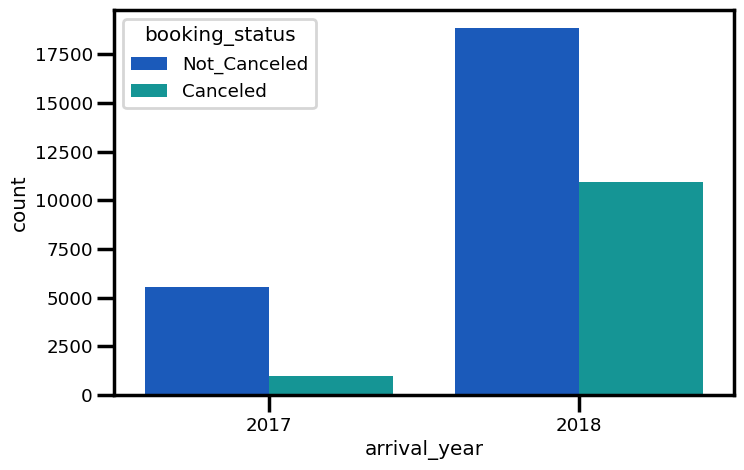

In [18]:
#No of booking in 2017 is less than year 2018.


plt.figure(figsize=(8,5))
sns.set_context("poster",font_scale = .60)
sns.countplot(x='arrival_year',data=hotel,palette='winter',hue='booking_status')

In [19]:
vals = hotel.arrival_year.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names,title="Year Distribution")
fig.show()

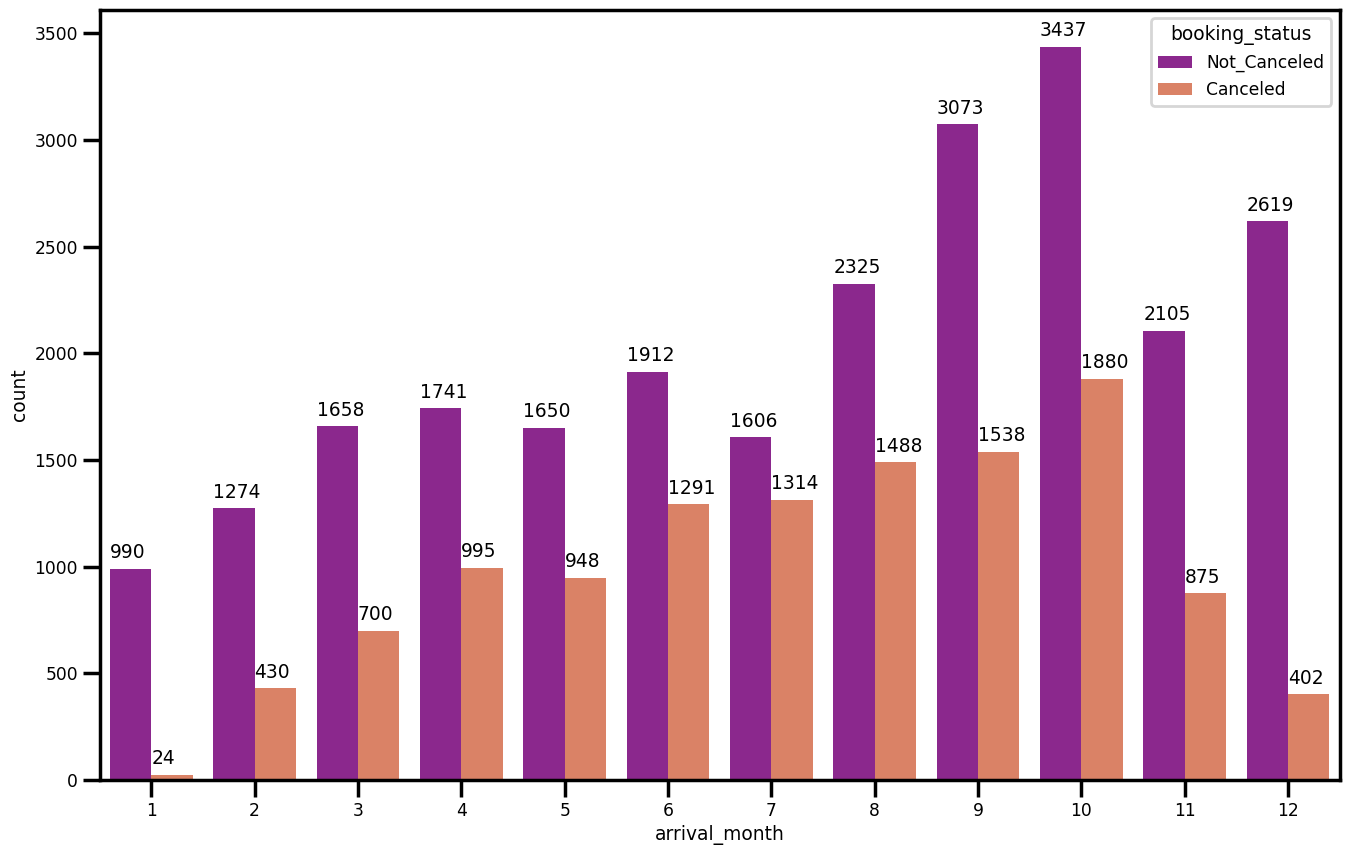

In [20]:

#during winter(November to march) cancellation vs Non-cancellation ratio is less than other months, i-e people less cancel their booking during that month

plt.figure(figsize=(16,10))
sns.set_context("poster",font_scale = .56)
ax = sns.countplot(x = hotel['arrival_month'],data = hotel , hue='booking_status',palette='plasma')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x(),p.get_height()+50))

<AxesSubplot:>

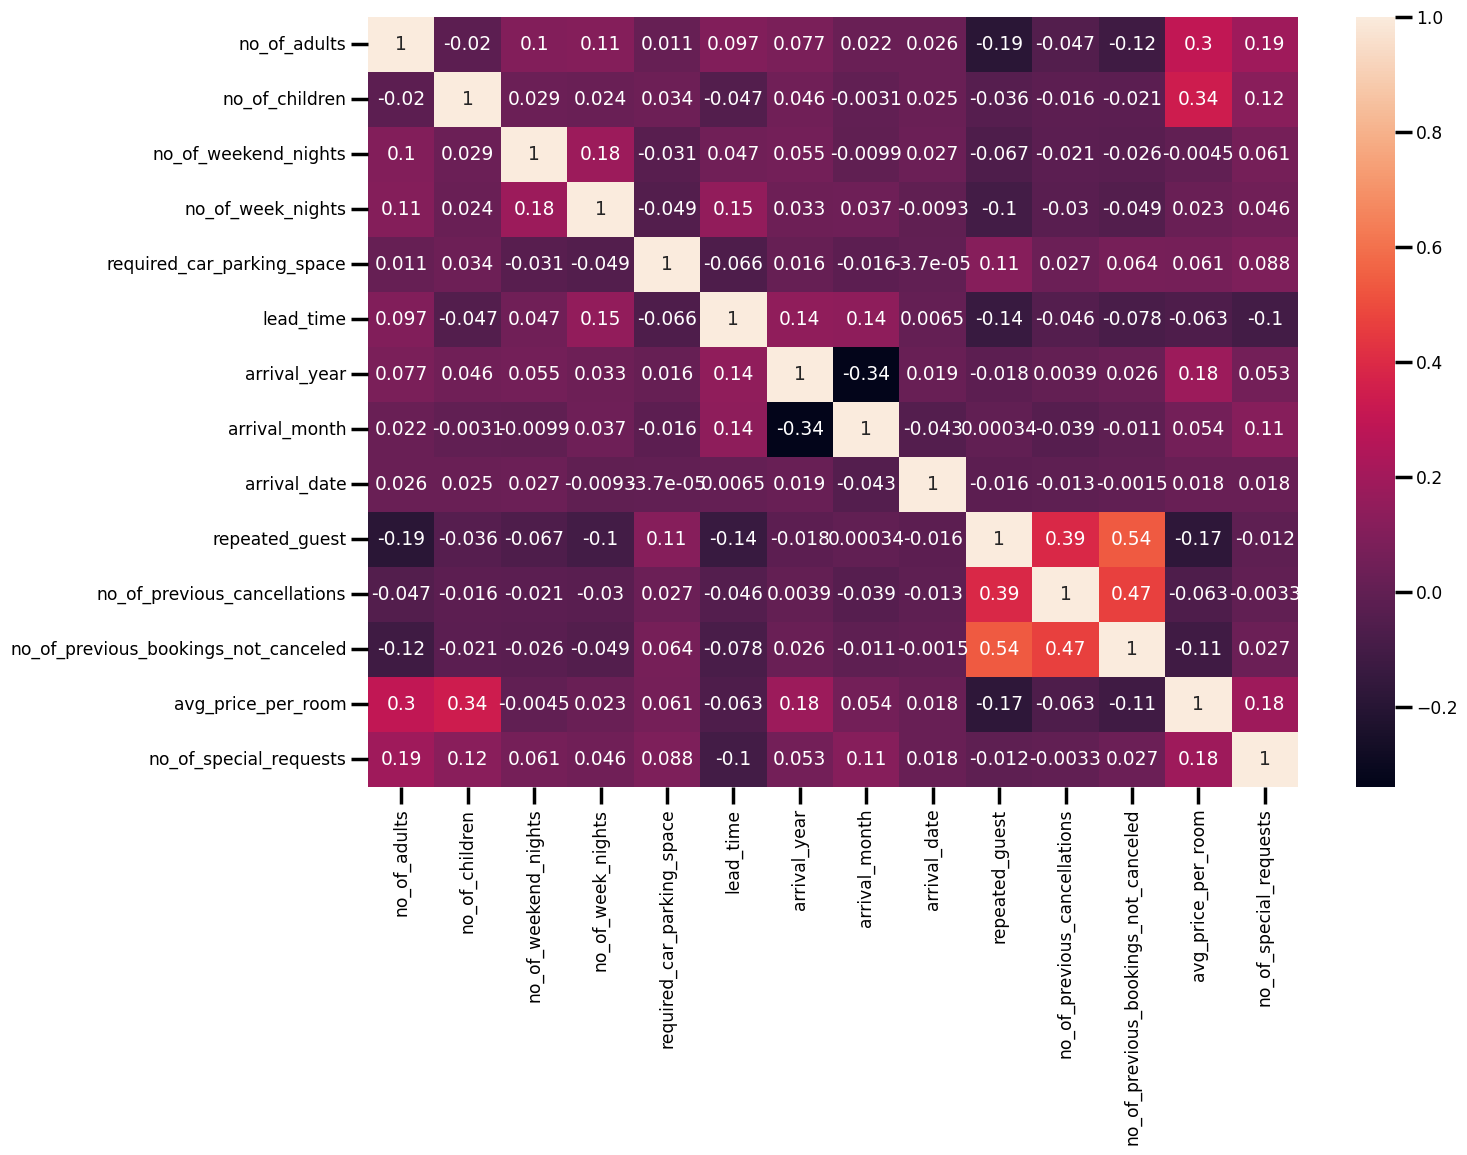

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(hotel.corr(),annot=True)

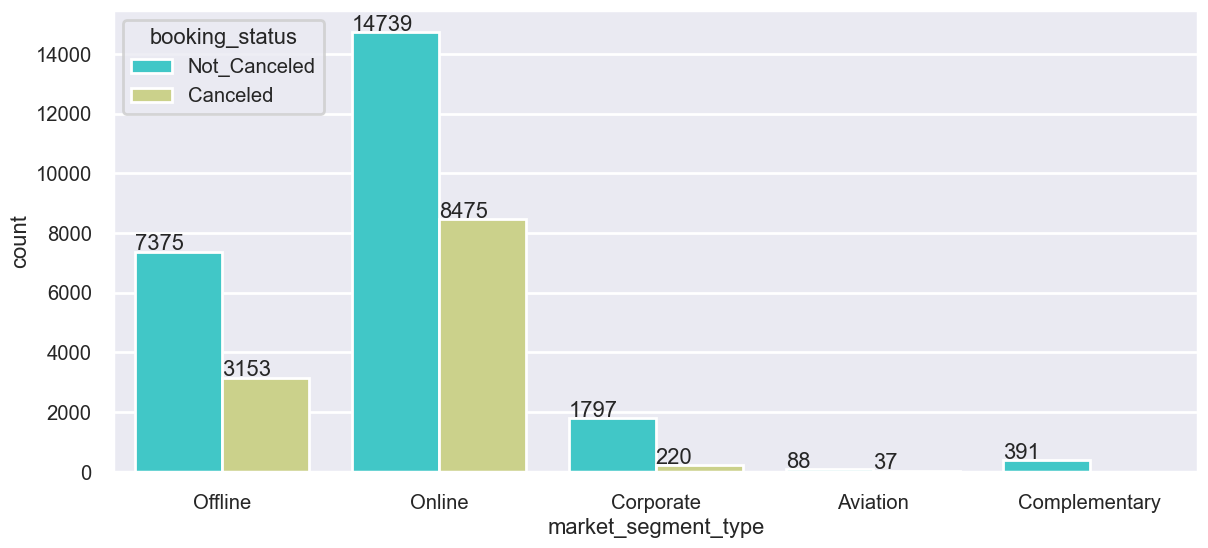

In [22]:
#Online and Offline are the most prominent sources of hotel bookings.
#Online market_segment is more prominient and makes most no of booking and cancellations.
#Offline's are the second best in terms of booking/cancel.
#Corporate,Aviation are more trustworty .
#aviation and corporate people cancel the least.

sns.set_context("poster",font_scale = .66)
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
ax = sns.countplot(x = 'market_segment_type',data = hotel , hue='booking_status',palette='rainbow')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x(),p.get_height()+50))

<AxesSubplot:xlabel='no_of_special_requests', ylabel='count'>

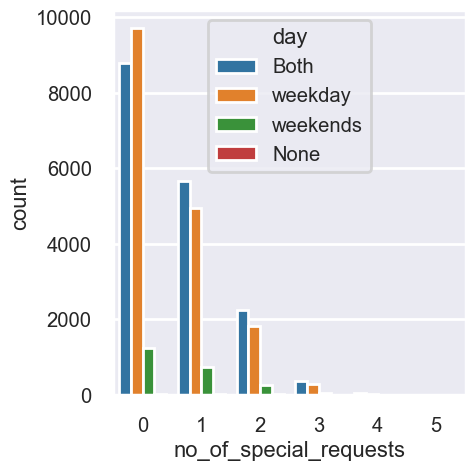

In [23]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot( x='no_of_special_requests', hue='day', data=hotel)


<AxesSubplot:xlabel='required_car_parking_space', ylabel='count'>

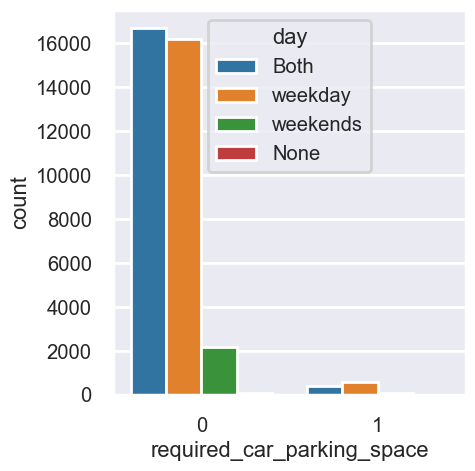

In [24]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,2)
sns.countplot( x='required_car_parking_space', hue='day', data=hotel)

<AxesSubplot:xlabel='repeated_guest', ylabel='count'>

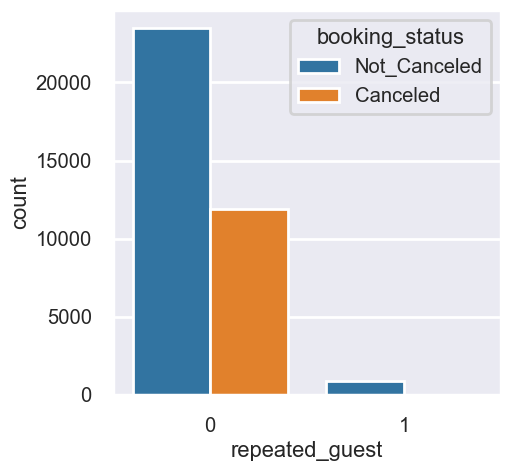

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(x='repeated_guest', hue='booking_status',data=hotel)

#Data has less repeated guests
#Repeated guests are less likely to cancell
#Repeated guests have much lower avg lead time
#Repeated guest who cancelled have much higher lead time than repeated guests who have not_cancelled

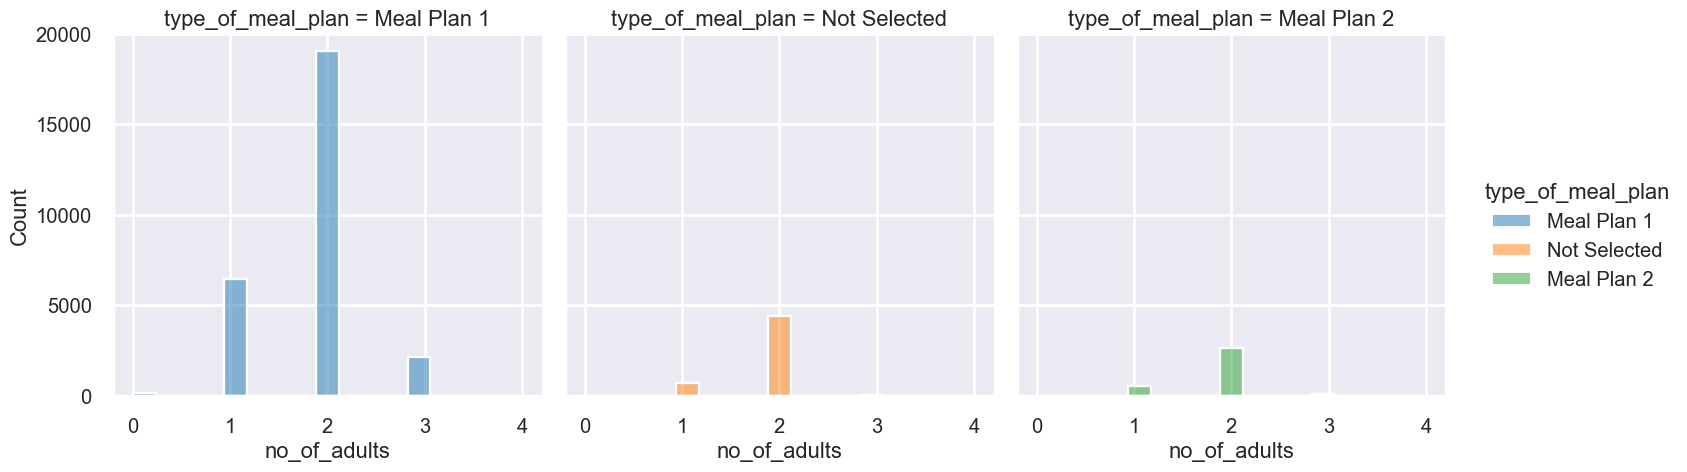

In [26]:
sns.displot(
    x="no_of_adults",
    hue="type_of_meal_plan",
    col="type_of_meal_plan",
    data=hotel[hotel["type_of_meal_plan"]!="Meal Plan 3"]
);

Text(0.5, 0.98, 'Distribution of Children by Meal Plan Type')

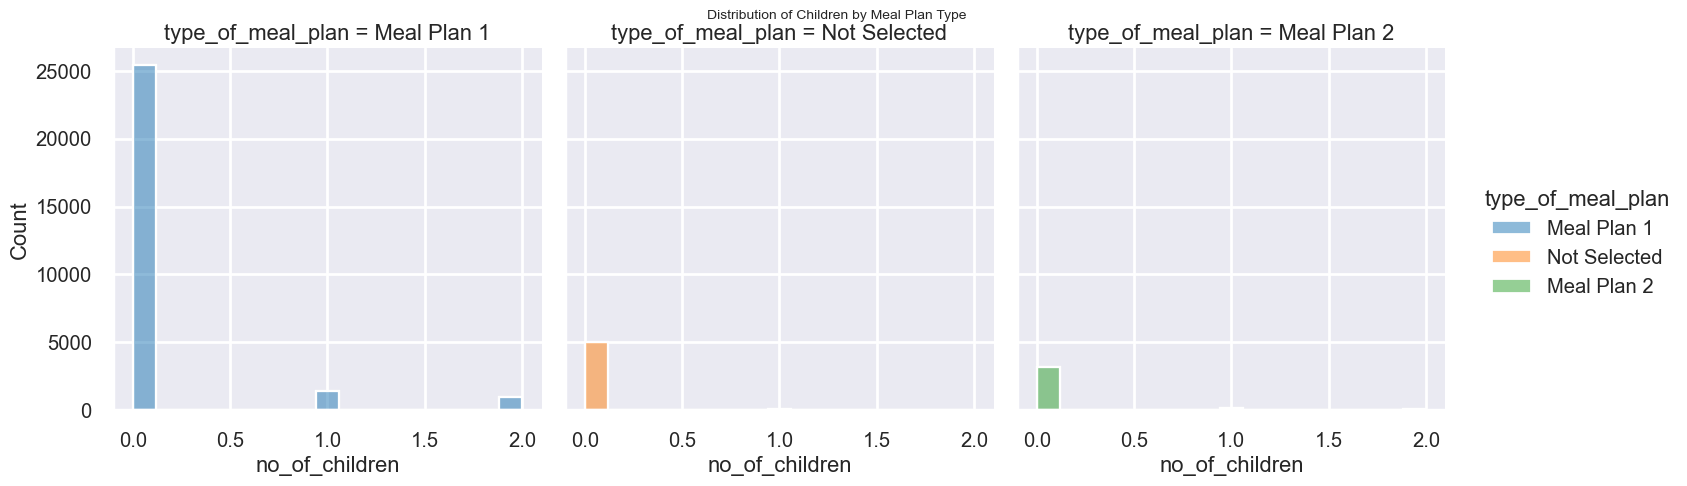

In [27]:
sns.displot(
    x="no_of_children",
    hue="type_of_meal_plan",
    col="type_of_meal_plan",
    data=hotel[(hotel["type_of_meal_plan"]!="Meal Plan 3") & (hotel["no_of_children"]<3)]
)


plt.suptitle("Distribution of Children by Meal Plan Type", fontsize=10)

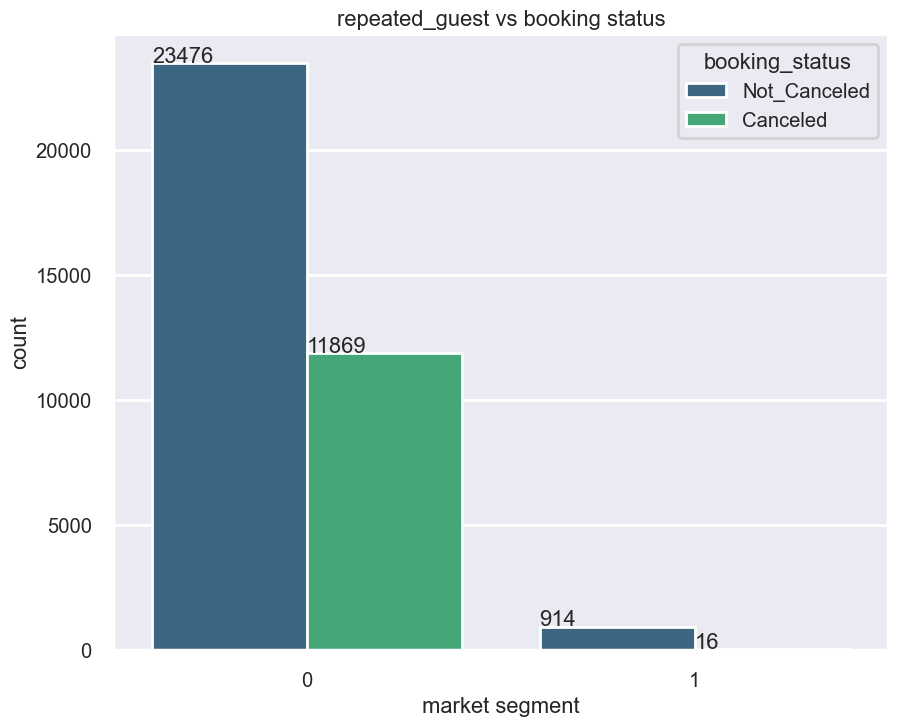

In [28]:
# on the basis of arrival_month 
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.countplot(data=hotel,x='repeated_guest',hue='booking_status',palette='viridis')
plt.title('repeated_guest vs booking status')
plt.xlabel('market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))

In [29]:
month_mapping = {
    1:'Jan',
    2:'Feb',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December',
}
hotel.arrival_month = hotel.arrival_month.map(month_mapping)
vals = hotel.arrival_month.value_counts()
names = vals.index
fig = px.pie(values=vals, names=names)
fig.show()

In [30]:
missing_values = hotel.isna().sum()
missing_values


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
day                                     0
dtype: int64

In [36]:
arrival_year = hotel['arrival_year'].unique()
arrival_month = hotel['arrival_month'].unique()
print(" Arrival Years:", arrival_year)
print("Arrival Months:", arrival_month)



 Arrival Years: [2017 2018]
Arrival Months: ['October' 'November' 'Feb' 'May' 'April' 'September' 'December' 'July'
 'June' 'August' 'March' 'Jan']


In [32]:
room_type = hotel['room_type_reserved'].unique()
print("room_type_reserved", room_type)

room_type_reserved ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


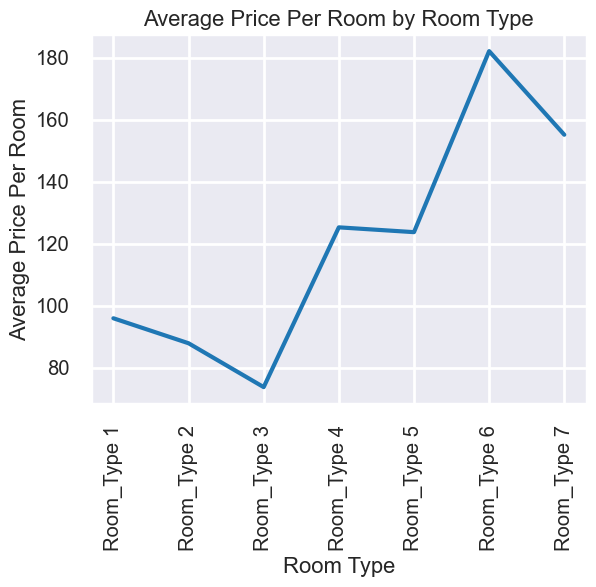

In [33]:
import matplotlib.pyplot as plt

grouped = hotel.groupby('room_type_reserved')
room_type_mean = grouped['avg_price_per_room'].mean()
room_type_mean.plot(kind='line')

plt.xlabel('Room Type')
plt.ylabel('Average Price Per Room')
plt.title('Average Price Per Room by Room Type')
plt.xticks(rotation=90)

plt.show()

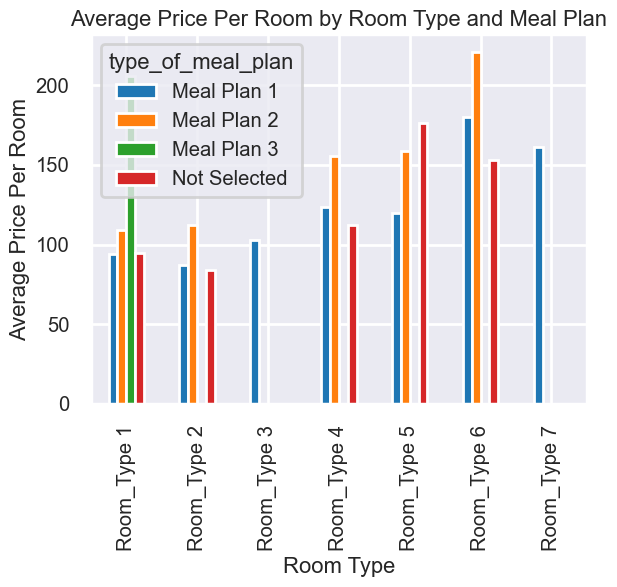

In [34]:
grouped = hotel.groupby(['type_of_meal_plan', 'room_type_reserved'])


means = grouped['avg_price_per_room'].mean().reset_index()


pivot = means.pivot(index='room_type_reserved', columns='type_of_meal_plan', values='avg_price_per_room')

pivot.plot(kind='bar', stacked=False)

plt.xlabel('Room Type')
plt.ylabel('Average Price Per Room')
plt.title('Average Price Per Room by Room Type and Meal Plan')

plt.show()

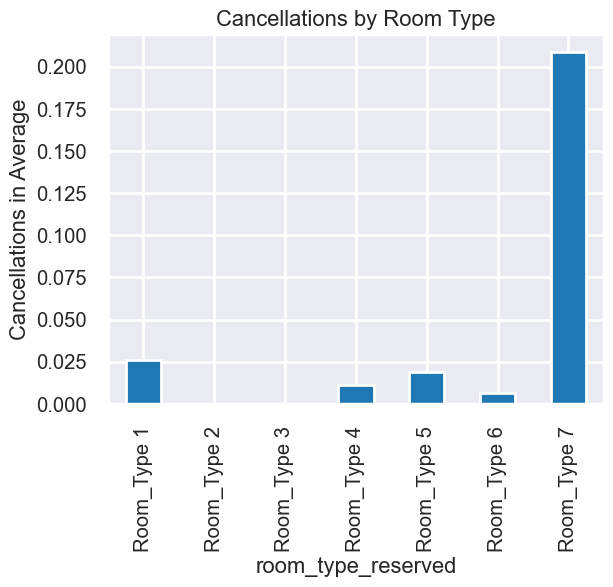

In [35]:
grouped = hotel.groupby('room_type_reserved')
mean = grouped['no_of_previous_cancellations'].mean()
mean.plot(kind='bar', x='room_type_reserved', y='no_of_previous_cancellations')
plt.title('Cancellations by Room Type')
plt.ylabel('Cancellations in Average')

plt.show()